In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
sns.set()

In [3]:
df = pd.read_csv('car_data.csv')

In [4]:
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.describe().astype('int')

,Unnamed: 0,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411,15411,15411,15411,15411,15411,15411,15411,15411,15411
mean,9811,5892971,1962623,6,55616,19,1486,100,5,774971
std,5643,56698513,2889635,3,51618,4,521,42,0,894128
min,0,311000,436000,0,100,4,793,38,0,40000
25%,4906,668000,872866,4,30000,17,1197,74,5,385000
50%,9872,855000,1206000,6,50000,19,1248,88,5,556000
75%,14668,1284000,1743000,8,70000,22,1582,117,5,825000
max,19543,988000000,91100000,29,3800000,33,6592,626,9,39500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   min_cost_price     15411 non-null  float64
 5   max_cost_price     15411 non-null  float64
 6   vehicle_age        15411 non-null  int64  
 7   km_driven          15411 non-null  int64  
 8   seller_type        15411 non-null  object 
 9   fuel_type          15411 non-null  object 
 10  transmission_type  15411 non-null  object 
 11  mileage            15411 non-null  float64
 12  engine             15411 non-null  int64  
 13  max_power          15411 non-null  float64
 14  seats              15411 non-null  int64  
 15  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(6

In [9]:
df['Present_Price'] = (df['max_cost_price']+df['min_cost_price'])/2

In [10]:
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Present_Price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,4.112027e+05
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,7.295000e+05
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.081004e+06
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,4.112027e+05
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,1.196500e+06


In [11]:
df.drop(['min_cost_price', 'max_cost_price'], axis = 1,inplace = True)

In [12]:
df.drop(['Unnamed: 0', 'car_name','brand', 'model'], axis = 1,inplace = True)

In [13]:
df.drop(['max_power', 'mileage'], axis = 1,inplace = True)

In [14]:
df.drop(['engine'], axis = 1,inplace = True)

In [15]:
df.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price,Present_Price
0,9,120000,Individual,Petrol,Manual,5,120000,4.112027e+05
1,5,20000,Individual,Petrol,Manual,5,550000,7.295000e+05
2,11,60000,Individual,Petrol,Manual,5,215000,1.081004e+06
3,9,37000,Individual,Petrol,Manual,5,226000,4.112027e+05
4,6,30000,Dealer,Diesel,Manual,5,570000,1.196500e+06


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age        15411 non-null  int64  
 1   km_driven          15411 non-null  int64  
 2   seller_type        15411 non-null  object 
 3   fuel_type          15411 non-null  object 
 4   transmission_type  15411 non-null  object 
 5   seats              15411 non-null  int64  
 6   selling_price      15411 non-null  int64  
 7   Present_Price      15411 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 963.3+ KB


In [17]:
df.describe()

,vehicle_age,km_driven,seats,selling_price,Present_Price
count,15411.000000,1.541100e+04,15411.000000,1.541100e+04,1.541100e+04
mean,6.036338,5.561648e+04,5.325482,7.749711e+05,3.927798e+06
std,3.013291,5.161855e+04,0.807628,8.941284e+05,2.887397e+07
min,0.000000,1.000000e+02,0.000000,4.000000e+04,3.810000e+05
25%,4.000000,3.000000e+04,5.000000,3.850000e+05,7.520000e+05
50%,6.000000,5.000000e+04,5.000000,5.560000e+05,1.038372e+06
75%,8.000000,7.000000e+04,5.000000,8.250000e+05,1.545500e+06
max,29.000000,3.800000e+06,9.000000,3.950000e+07,4.993500e+08


In [22]:
df.drop(df[df['Present_Price'] > 10000000].index, inplace = True)

In [23]:
df.max()

vehicle_age                        29
km_driven                     3800000
seller_type          Trustmark Dealer
fuel_type                      Petrol
transmission_type              Manual
seats                               9
selling_price                 8250000
Present_Price               9522500.0
dtype: object

In [24]:
df.min()

vehicle_age                  0
km_driven                  100
seller_type             Dealer
fuel_type                  CNG
transmission_type    Automatic
seats                        0
selling_price            40000
Present_Price         381000.0
dtype: object

<AxesSubplot:xlabel='Present_Price'>

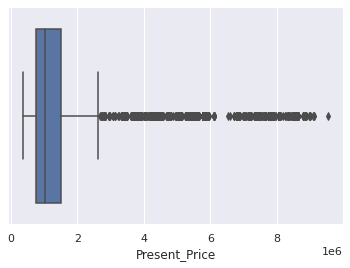

In [25]:
sns.boxplot(x = df['Present_Price'])

In [26]:
df.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
seats                  int64
selling_price          int64
Present_Price        float64
dtype: object

In [28]:
list1=[]  #storing all the features having categorical datatype
for i in df.columns:
    if df[i].dtypes == "object":
         list1.append(i)

In [29]:
cat_df=df[list1]
cat_df.head()

,seller_type,fuel_type,transmission_type
0,Individual,Petrol,Manual
1,Individual,Petrol,Manual
2,Individual,Petrol,Manual
3,Individual,Petrol,Manual
4,Dealer,Diesel,Manual


In [30]:
df.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price,Present_Price
0,9,120000,Individual,Petrol,Manual,5,120000,4.112027e+05
1,5,20000,Individual,Petrol,Manual,5,550000,7.295000e+05
2,11,60000,Individual,Petrol,Manual,5,215000,1.081004e+06
3,9,37000,Individual,Petrol,Manual,5,226000,4.112027e+05
4,6,30000,Dealer,Diesel,Manual,5,570000,1.196500e+06


**Data Visualization**

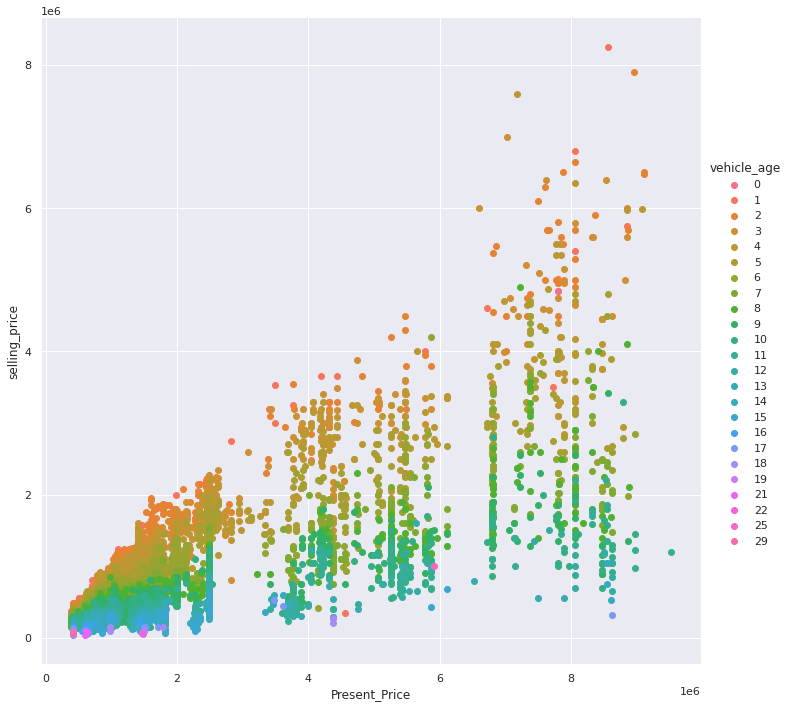

In [31]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="vehicle_age",height=10).map(plt.scatter,"Present_Price","selling_price").add_legend()
plt.show()

**More number of Years you will use your car lesser the amount you will get.**

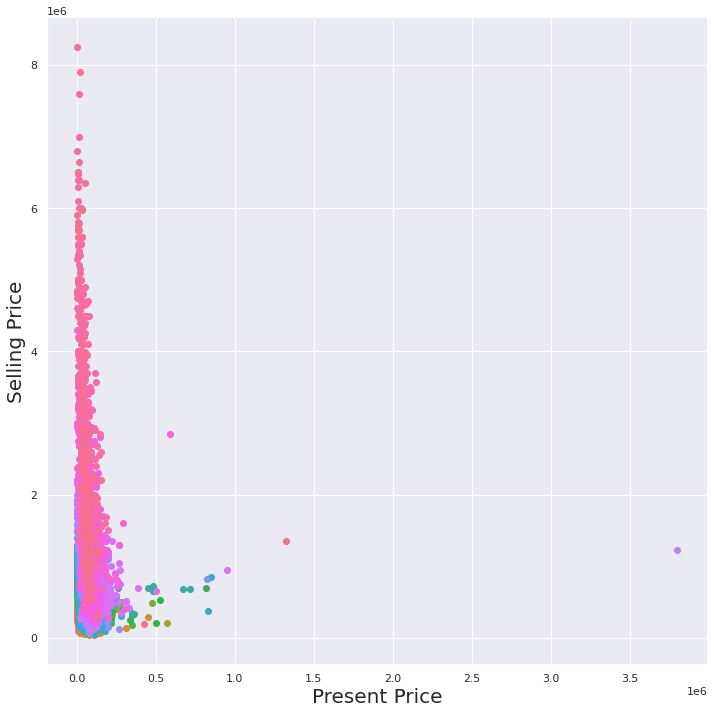

In [32]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Present_Price",height=10).map(plt.scatter,"km_driven","selling_price")
plt.xlabel("Present Price",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

**lesser the car would be driven higher will be the cost as we see the graph at max distance i e:- 3800000 kilometres the car’s cost is near to Zero or we can say nobody is willing to pay any amount to those cars.**

**plotting pair plot**

We cannot visualize multi dimensional scatter plot hence by using pair plot we can visualize each and every dimension of (Dimension with numerical variable )multidimensional data precisely.

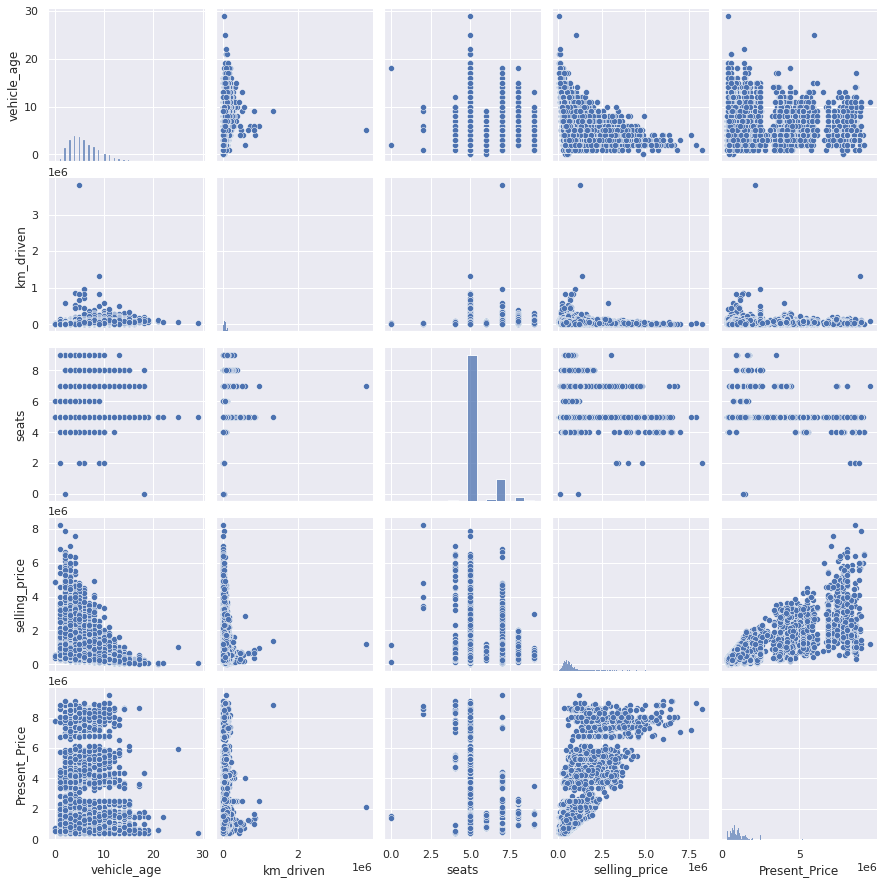

In [33]:
sns.pairplot(df, vars = ["vehicle_age", "km_driven", "seats", "selling_price", "Present_Price"])

As we see there are very less overlapping in dataset is seen so we cannot use knn ,linear regression,svm and because of the dynamic nature of dataset we even cannot use decision tree so we will go with random forest and xgboost.

**Uni variate analysis**

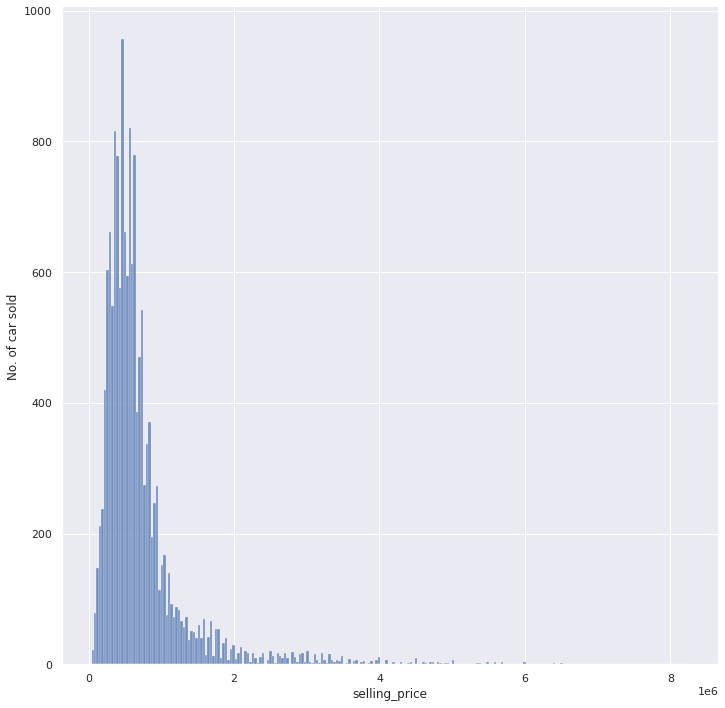

In [34]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=10).map(sns.histplot,"selling_price")
plt.ylabel('No. of car sold')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


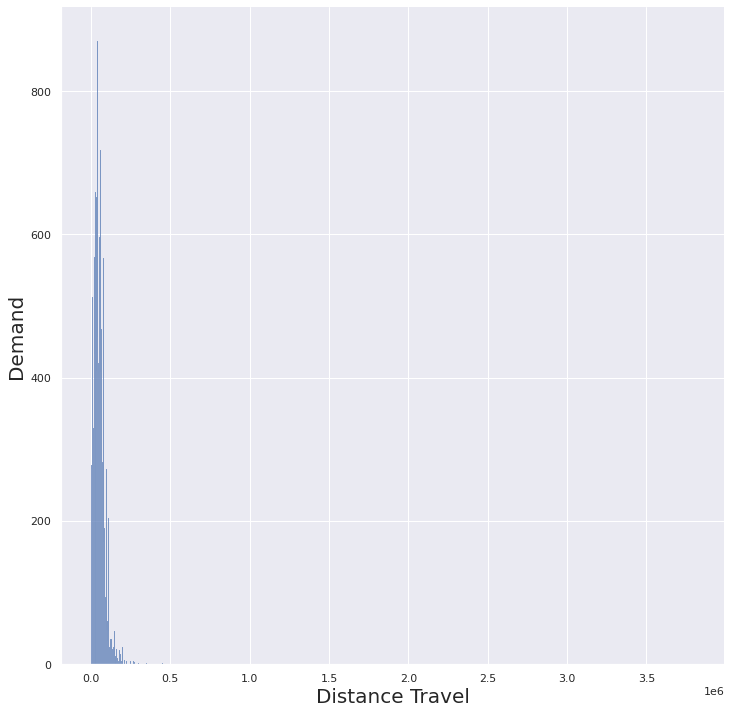

In [35]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=10).map(sns.histplot,"km_driven")
plt.xlabel("Distance Travel",Fontsize=20)
plt.ylabel("Demand",Fontsize=20)
plt.show()

Demand for those car that has been traveled less distance are in more demand especially if car has traveled distance within a range of 0–5000 kilometre people are more attracted towards them.

**multivariate Analysis**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


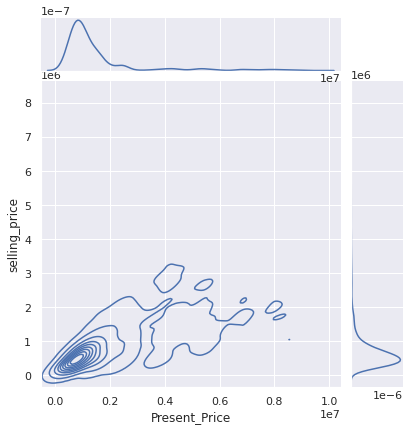

In [37]:
sns.set_style("darkgrid")
sns.jointplot("Present_Price","selling_price",data=df,kind="kde")
plt.show()

In [38]:
list1

['seller_type', 'fuel_type', 'transmission_type']

In [39]:
df=df.drop(list1,axis=1)

In [40]:
df.head()

,vehicle_age,km_driven,seats,selling_price,Present_Price
0,9,120000,5,120000,4.112027e+05
1,5,20000,5,550000,7.295000e+05
2,11,60000,5,215000,1.081004e+06
3,9,37000,5,226000,4.112027e+05
4,6,30000,5,570000,1.196500e+06


Now we will do feature engineering on cat_df to convert the categorical variable into numerical variable.But before that we will check how many unique categorical variable each feature consists.

In [41]:
cat_df.head()

,seller_type,fuel_type,transmission_type
0,Individual,Petrol,Manual
1,Individual,Petrol,Manual
2,Individual,Petrol,Manual
3,Individual,Petrol,Manual
4,Dealer,Diesel,Manual


In [42]:
dict1={}
for index,col in enumerate(cat_df.columns):
    dict1[col]=cat_df[col].unique().tolist()
dict1

{'seller_type': ['Individual', 'Dealer', 'Trustmark Dealer'],
 'fuel_type': ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
 'transmission_type': ['Manual', 'Automatic']}

In [43]:
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head()

,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,1,0,0,0,0,1,1
1,1,0,0,0,0,1,1
2,1,0,0,0,0,1,1
3,1,0,0,0,0,1,1
4,0,0,1,0,0,0,1


Now we will concatenate encoded cat_df with original df and will also delete the categorical variable column.

In [44]:
df=pd.concat([df,cat_df],axis=1)
df.head()

,vehicle_age,km_driven,seats,selling_price,Present_Price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,5,120000,4.112027e+05,1,0,0,0,0,1,1
1,5,20000,5,550000,7.295000e+05,1,0,0,0,0,1,1
2,11,60000,5,215000,1.081004e+06,1,0,0,0,0,1,1
3,9,37000,5,226000,4.112027e+05,1,0,0,0,0,1,1
4,6,30000,5,570000,1.196500e+06,0,0,1,0,0,0,1


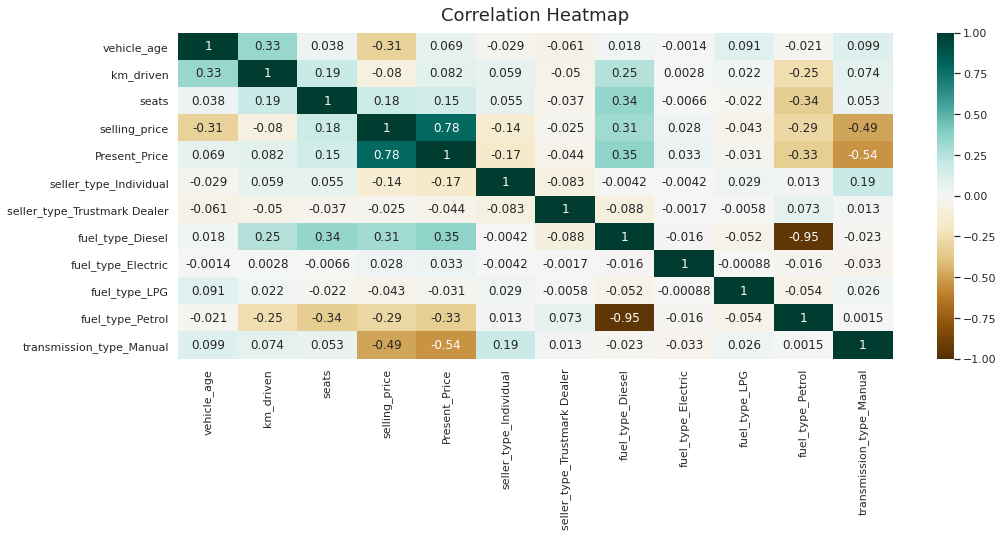

In [45]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

**Pre Modeling Steps**


Splitting dataset into dependent and independent variable.

In [46]:
df.head()

,vehicle_age,km_driven,seats,selling_price,Present_Price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,5,120000,4.112027e+05,1,0,0,0,0,1,1
1,5,20000,5,550000,7.295000e+05,1,0,0,0,0,1,1
2,11,60000,5,215000,1.081004e+06,1,0,0,0,0,1,1
3,9,37000,5,226000,4.112027e+05,1,0,0,0,0,1,1
4,6,30000,5,570000,1.196500e+06,0,0,1,0,0,0,1


In [47]:
Y=df['selling_price']

In [48]:
Y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [49]:
X = df
X.drop(['selling_price'], axis = 1,inplace = True)

In [50]:
X.head()

,vehicle_age,km_driven,seats,Present_Price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,5,4.112027e+05,1,0,0,0,0,1,1
1,5,20000,5,7.295000e+05,1,0,0,0,0,1,1
2,11,60000,5,1.081004e+06,1,0,0,0,0,1,1
3,9,37000,5,4.112027e+05,1,0,0,0,0,1,1
4,6,30000,5,1.196500e+06,0,0,1,0,0,0,1


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12112, 11)
(12112,)
(3029, 11)
(3029,)


**Choosing best fit model for our dataset :**

checking which model will be best for our dataset as from pair plot it is clear that we have to take model which do prediction on non linear and combination of categorical and numerical data that are decision tree,random forest and xgboost then we will check which model will have high accuracy based on that we select the model. We can choose our best fit model using cross validation score.

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART 0.9003790133228347 0.018082369851609863
KNN 0.7854851664974196 0.021178858696039995
RF 0.939800121785854 0.007728424685663561
XGBOOST 0.9436537926807149 0.00778095375722886


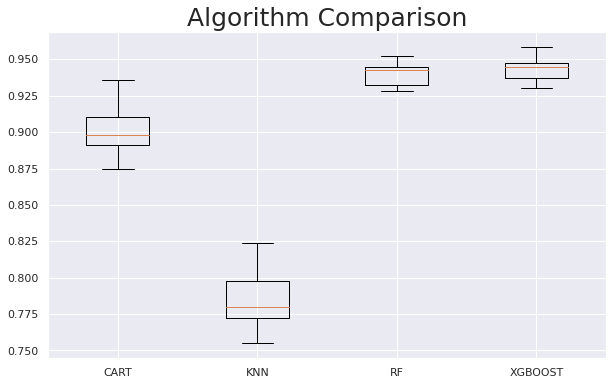

In [53]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see above accuracy score result we can say that XGboost gives better accuracy with very low standard deviation hence we should go with XGboost.

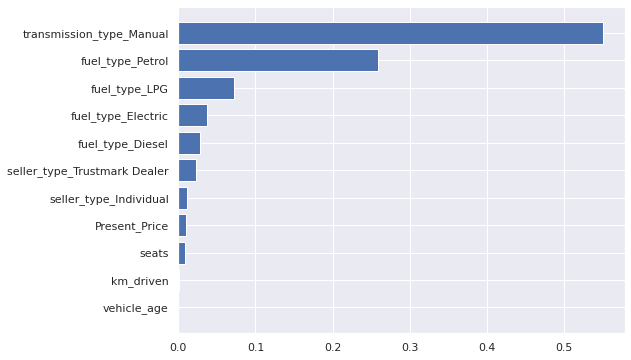

In [54]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,Y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

**Hyper parameter tuning :**

In [ ]:
param_grid={"n_estimators":[100,120,130,140,150],
            "max_depth":range(1,10),
            "booster":["gbtree","gblinear","dart"]
           }
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBRegressor()
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=10,cv=10)
random_cv.fit(X_train,Y_train)

In [57]:
random_cv.best_params_

{'n_estimators': 120, 'max_depth': 5, 'booster': 'gbtree'}

In [58]:
from sklearn.metrics import r2_score 
xgb=XGBRegressor(n_estimators= 120, max_depth=5,booster= 'gbtree')
xgb.fit(X_train,Y_train)
Y_train_predicted=xgb.predict(X_train)
Y_test_predicted=xgb.predict(X_test)
print("Train set accuracy: ",r2_score(Y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(Y_test,Y_test_predicted))

Train set accuracy:  0.9798077828007846
Test set accuracy :  0.9531874777482612


**Understanding predicted values;**

In [59]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted.astype('int64') })
Result.head(10)

,Actual,Predicted
6721,250000,282645
12274,525000,496916
4476,700000,719811
15176,1500000,1528767
15099,600000,686778
11495,220000,348376
12098,495000,545408
5812,380000,297080
10310,950000,982245
4667,598000,537325


<AxesSubplot:xlabel='selling_price'>

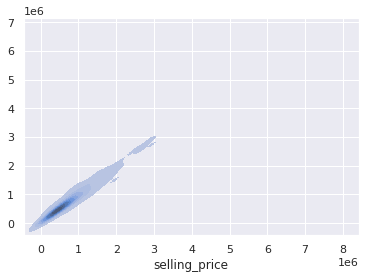

In [65]:
sns.kdeplot(x = Y_test,y = Y_test_predicted, color='b', legend = True, shade = True)

In [66]:
import joblib

In [67]:
filename = 'xgb.sav'
joblib.dump(xgb, filename)

['xgb.sav']

In [68]:
x = np.array([2,10000,5,3500000,0,0,0,0,0,1,0]).reshape(1, 11)
predicted=xgb.predict(x)
predicted

array([3065367.], dtype=float32)